AttributeError: 'AxesSubplot' object has no property 'ylable'

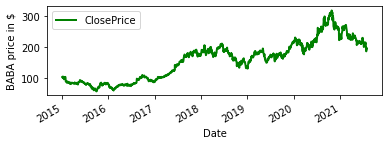

In [1]:
# Implementation of momentum

import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import math as math
from pandas_datareader import data


start_data = '2015-01-01'
end_data = '2021-08-01'
FILENAME = 'baba_data_2015_2021.pkl'

try:
    goog_data = pd.read_pickle(FILENAME)
except FileNotFoundError:
    goog_data = data.DataReader('BABA', 'yahoo', start_data, end_data)
    goog_data.to_pickle(FILENAME)

close = goog_data['Close']

time_period = 20

history = []
mom_values = []

for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del (history[0])
    
    mom = close_price - history[0]
    mom_values.append(mom)

goog_data = goog_data.assign(
    ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(
    MomentumFromPrice20DaysAgo=pd.Series(mom_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
mom = goog_data['MomentumFromPrice20DaysAgo']

fig = plt.figure()

ax1 = fig.add_subplot(211, ylabel='BABA price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)

ax2 = fig.add_subplot(212, ylabel='Momentum in $')
mom.plot(ax=ax2, color='b', lw=2., legend=True)

fig.show()
